In [14]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage import io
# import io
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import peak_signal_noise_ratio as psnr
from tabulate import tabulate
from PIL import Image

In [15]:
# #add salt and paper noise 
# # Load the image
# img = cv2.imread("cameraman.bmp", cv2.IMREAD_GRAYSCALE)

# # Define noise levels
# noise_levels = [0.01, 0.04]

# # Add noise to the image
# noisy_images = []
# for level in noise_levels:
#     noisy_image = np.copy(img)  # Create a copy of the original image
#     h, w = noisy_image.shape
#     num_pixels = int(level * h * w)  # Calculate the number of noisy pixels to add
#     coords = np.random.randint(0, h, num_pixels), np.random.randint(0, w, num_pixels)
#     noisy_image[coords] = np.random.randint(0, 2, num_pixels) * 255  # Add salt and pepper noise
#     noisy_images.append(noisy_image)

# # Display the original image and the noisy images

# # cv2.imshow("Original", img)
# # cv2.imshow("Noise Level: 1%", noisy_images[0])
# # cv2.imshow("Noise Level: 4%", noisy_images[1])

# fig,axs=plt.subplots(1, 3, figsize=(15, 8))

# axs[0].imshow(img, cmap='gray')
# axs[0].set_title('Original')
# axs[1].imshow(noisy_images[0], cmap='gray')
# axs[1].set_title('Noise Level: 1%"')
# axs[2].imshow(noisy_images[1], cmap='gray')
# axs[2].set_title('Noise Level: 4%')
# plt.show()



In [16]:

# # Load the image
# img = cv2.imread("cameraman.bmp", cv2.IMREAD_GRAYSCALE)

# # Define noise levels
# noise_levels = [1, 5]

# # Add noise to the image
# noisy_images = []
# for level in noise_levels:
#     noisy_image = np.copy(img)  # Create a copy of the original image
#     h, w = noisy_image.shape
#     noise = np.random.normal(0, level, (h, w))  # Generate Gaussian noise
#     noisy_image = noisy_image.astype(float) + noise  # Add noise to the image
#     noisy_image = np.clip(noisy_image, 0, 255)  # Clip values outside the range [0, 255]
#     noisy_image = noisy_image.astype(np.uint8)  # Convert back to uint8
#     noisy_images.append(noisy_image)

# # Display the original image and the noisy images
# fig, axs = plt.subplots(1, 3, figsize=(15, 8))

# axs[0].imshow(img, cmap='gray')
# axs[0].set_title('Original')
# axs[1].imshow(noisy_images[0], cmap='gray')
# axs[1].set_title('Gaussian Noise, σ = 1')
# axs[2].imshow(noisy_images[1], cmap='gray')
# axs[2].set_title('Gaussian Noise, σ = 5')
# plt.show()


In [17]:
class NoiseGenerator:
    def __init__(self, img_path):
        self.img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    
    def add_salt_and_pepper_noise(self, noise_levels):
        noisy_images = []
        for level in noise_levels:
            noisy_image = np.copy(self.img)
            h, w = noisy_image.shape
            num_pixels = int(level * h * w)
            coords = np.random.randint(0, h, num_pixels), np.random.randint(0, w, num_pixels)
            noisy_image[coords] = np.random.randint(0, 2, num_pixels) * 255
            noisy_images.append(noisy_image)
        return noisy_images
    
    def add_gaussian_noise(self, noise_levels):
        noisy_images = []
        for level in noise_levels:
            noisy_image = np.copy(self.img)
            h, w = noisy_image.shape
            noise = np.random.normal(0, level, (h, w))
            noisy_image = noisy_image.astype(float) + noise
            noisy_image = np.clip(noisy_image, 0, 255)
            noisy_image = noisy_image.astype(np.uint8)
            noisy_images.append(noisy_image)
        return noisy_images


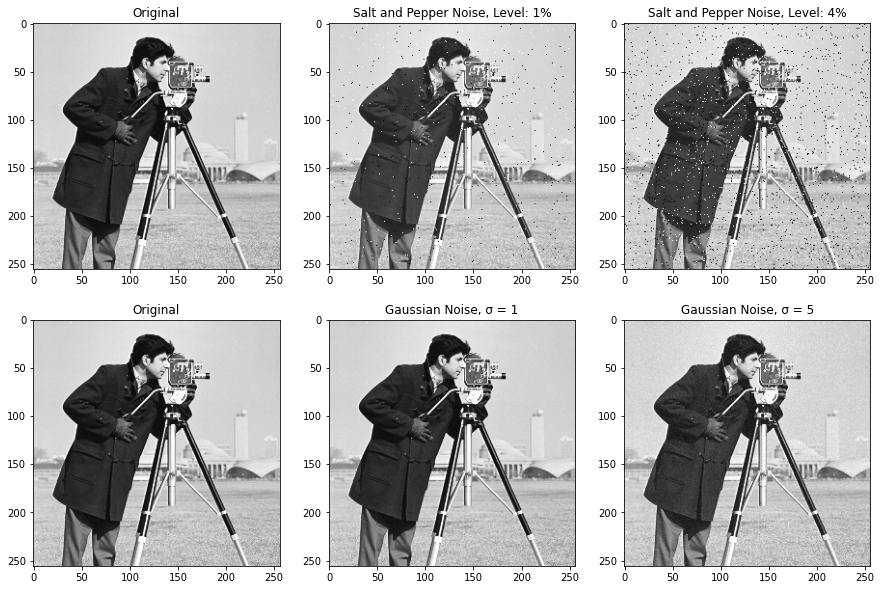

In [21]:
# Create a NoiseGenerator instance
ng = NoiseGenerator("cameraman.bmp")

# Generate salt and pepper noise
salt_and_pepper_noise = ng.add_salt_and_pepper_noise([0.01, 0.04])

# Generate Gaussian noise
gaussian_noise = ng.add_gaussian_noise([1, 5])

# Display the original image and the noisy images
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

axs[0, 0].imshow(ng.img, cmap='gray')
axs[0, 0].set_title('Original')

axs[0, 1].imshow(salt_and_pepper_noise[0], cmap='gray')
axs[0, 1].set_title('Salt and Pepper Noise, Level: 1%')
Image.fromarray(salt_and_pepper_noise[0]).save('1.png')


axs[0, 2].imshow(salt_and_pepper_noise[1], cmap='gray')
axs[0, 2].set_title('Salt and Pepper Noise, Level: 4%')
Image.fromarray(salt_and_pepper_noise[1]).save('2.png')

axs[1, 0].imshow(ng.img, cmap='gray')
axs[1, 0].set_title('Original')

axs[1, 1].imshow(gaussian_noise[0], cmap='gray')
axs[1, 1].set_title('Gaussian Noise, σ = 1')
Image.fromarray(gaussian_noise[0]).save('3.png')

axs[1, 2].imshow(gaussian_noise[1], cmap='gray')
axs[1, 2].set_title('Gaussian Noise, σ = 5')
Image.fromarray(gaussian_noise[1]).save('4.png')

plt.show()

In [19]:
# # Read the image
# img = salt_and_pepper_noise[1]

# # Pad the image to handle the filter kernel
# img_padded = cv2.copyMakeBorder(img, 1, 1, 1, 1, cv2.BORDER_REPLICATE)

# # Take the Fourier transform
# f = np.fft.fft2(img_padded)
# fshift = np.fft.fftshift(f)

# # Calculate the magnitude spectrum (for visualization purposes)
# magnitude_spectrum = 20 * np.log(np.abs(fshift))


# fshift_uint8 = np.abs(fshift)
# fshift_uint8 -= fshift_uint8.min()
# fshift_uint8 = (fshift_uint8 / fshift_uint8.max() * 255).astype(np.uint8)


# # Apply the arithmetic mean filter with a 3x3 kernel
# kernel_size = 3
# kernel = np.ones((kernel_size, kernel_size), np.float32) / (kernel_size ** 2)
# fshift_uint8 = np.abs(fshift)
# fshift_uint8 -= fshift_uint8.min()
# fshift_uint8 = (fshift_uint8 / fshift_uint8.max() * 255).astype(np.uint8)
# filtered_fshift = cv2.filter2D(fshift_uint8, -1, kernel, borderType=cv2.BORDER_REPLICATE)

# # Reconstruct the image
# filtered_f = np.fft.ifftshift(filtered_fshift)
# filtered_img = np.fft.ifft2(filtered_f)
# filtered_img = np.abs(filtered_img)

# # Apply the arithmetic mean filter with a 5x5 kernel
# kernel_size = 5
# kernel = np.ones((kernel_size, kernel_size), np.float32) / (kernel_size ** 2)
# fshift_uint8 = np.abs(fshift)
# fshift_uint8 -= fshift_uint8.min()
# fshift_uint8 = (fshift_uint8 / fshift_uint8.max() * 255).astype(np.uint8)
# filtered_fshift = cv2.filter2D(fshift_uint8, -1, kernel, borderType=cv2.BORDER_REPLICATE)

# # Reconstruct the image
# filtered_f = np.fft.ifftshift(filtered_fshift)
# filtered_img_2 = np.fft.ifft2(filtered_f)
# filtered_img_2 = np.abs(filtered_img_2)

# # Plot the results
# fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# axs[0, 0].imshow(img, cmap="gray")
# axs[0, 0].set_title("Original Image")

# axs[0, 1].imshow(magnitude_spectrum, cmap="gray")
# axs[0, 1].set_title("Magnitude Spectrum")

# axs[1, 0].imshow(filtered_img, cmap="gray")
# axs[1, 0].set_title("Filtered Image (3x3)")

# axs[1, 1].imshow(filtered_img_2, cmap="gray")
# axs[1, 1].set_title("Filtered Image (5x5)")

# plt.show()


In [7]:
import numpy as np
import cv2
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import peak_signal_noise_ratio as psnr

class ImageFilter:
    def __init__(self, img):
        self.img = img
        self.height, self.width = img.shape[:2]
        
    def apply_padding(self, img, padding_size):
        padded_img = np.zeros((self.height + padding_size*2, self.width + padding_size*2), dtype=np.uint8)
        padded_img[padding_size:self.height+padding_size, padding_size:self.width+padding_size] = img
        return padded_img
        
    def arithmetic_mean_filter(self, kernel_size):
        if kernel_size not in [3, 5]:
            raise ValueError("Kernel size must be 3 or 5")
        padding_size = kernel_size // 2
        padded_img = self.apply_padding(self.img, padding_size)
        filtered_img = np.zeros_like(padded_img, dtype=np.uint8)
        for i in range(padding_size, self.height+padding_size):
            for j in range(padding_size, self.width+padding_size):
                filtered_img[i,j] = np.mean(padded_img[i-padding_size:i+padding_size+1, j-padding_size:j+padding_size+1])
        return filtered_img[padding_size:self.height+padding_size, padding_size:self.width+padding_size]
    
    def median_filter(self, kernel_size):
        if kernel_size not in [3, 5]:
            raise ValueError("Kernel size must be 3 or 5")
        padding_size = kernel_size // 2
        padded_img = self.apply_padding(self.img, padding_size)
        filtered_img = np.zeros_like(padded_img, dtype=np.uint8)
        for i in range(padding_size, self.height+padding_size):
            for j in range(padding_size, self.width+padding_size):
                filtered_img[i,j] = np.median(padded_img[i-padding_size:i+padding_size+1, j-padding_size:j+padding_size+1])
        return filtered_img[padding_size:self.height+padding_size, padding_size:self.width+padding_size]
    
    def compare_filters(self):
        original_img = self.img
        am_filtered_3 = self.arithmetic_mean_filter(3)
        am_filtered_5 = self.arithmetic_mean_filter(5)
        med_filtered_3 = self.median_filter(3)
        med_filtered_5 = self.median_filter(5)

        fig, axs = plt.subplots(2, 3, figsize=(10, 8))

        axs[0, 0].imshow(original_img, cmap="gray")
        axs[0, 0].set_title("Input Image")

        axs[0, 1].imshow(am_filtered_3, cmap="gray")
        axs[0, 1].set_title("Arithmetic Mean Filter (3x3)")

        axs[0, 2].imshow(am_filtered_5, cmap="gray")
        axs[0, 2].set_title("Arithmetic Mean Filter (5x5)")

        axs[1, 0].imshow(med_filtered_3, cmap="gray")
        axs[1, 0].set_title("Median Filter (3x3)")

        axs[1, 1].imshow(med_filtered_5, cmap="gray")
        axs[1, 1].set_title("Median Filter (5x5)")

        axs[1, 2].axis("off")

        fig.tight_layout()
        plt.show()

        ssim_am_3 = ssim(original_img, am_filtered_3,  channel_axis=None)
        ssim_am_5 = ssim(original_img, am_filtered_5,  channel_axis=None)
        ssim_med_3 = ssim(original_img, med_filtered_3,  channel_axis=None)
        ssim_med_5 = ssim(original_img, med_filtered_5,  channel_axis=None)


        psnr_am_3 = psnr(original_img, am_filtered_3, data_range=255)
        psnr_am_5 = psnr(original_img, am_filtered_5, data_range=255)
        psnr_med_3 = psnr(original_img, med_filtered_3, data_range=255)
        psnr_med_5 = psnr(original_img, med_filtered_5, data_range=255)

        return {
            "ssim_am_3": ssim_am_3,
            "ssim_am_5": ssim_am_5,
            "ssim_med_3": ssim_med_3,
            "ssim_med_5": ssim_med_5,
            "psnr_am_3": psnr_am_3,
            "psnr_am_5": psnr_am_5,
            "psnr_med_3": psnr_med_3,
            "psnr_med_5": psnr_med_5
        }
    


original image


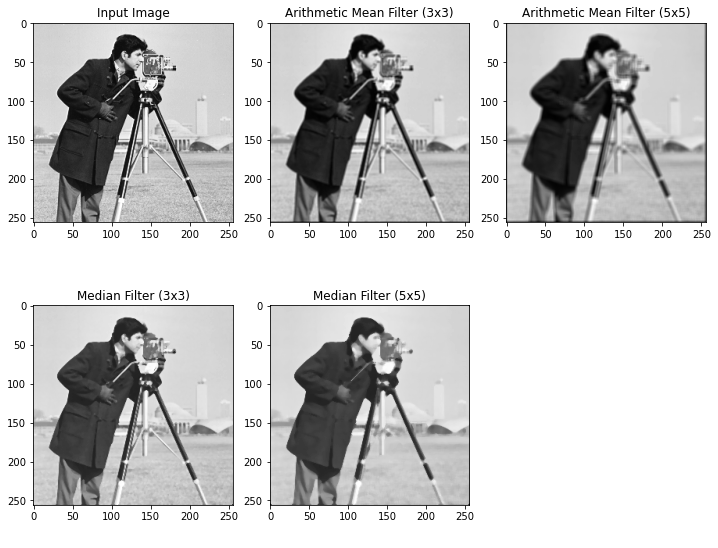

+------------+-----------+
| Metric     |     Value |
+============+===========+
| ssim_am_3  |  0.811019 |
+------------+-----------+
| ssim_am_5  |  0.682788 |
+------------+-----------+
| ssim_med_3 |  0.853332 |
+------------+-----------+
| ssim_med_5 |  0.754155 |
+------------+-----------+
| psnr_am_3  | 23.2355   |
+------------+-----------+
| psnr_am_5  | 20.5008   |
+------------+-----------+
| psnr_med_3 | 26.0607   |
+------------+-----------+
| psnr_med_5 | 22.3272   |
+------------+-----------+

******************************************
1% salt and pepr


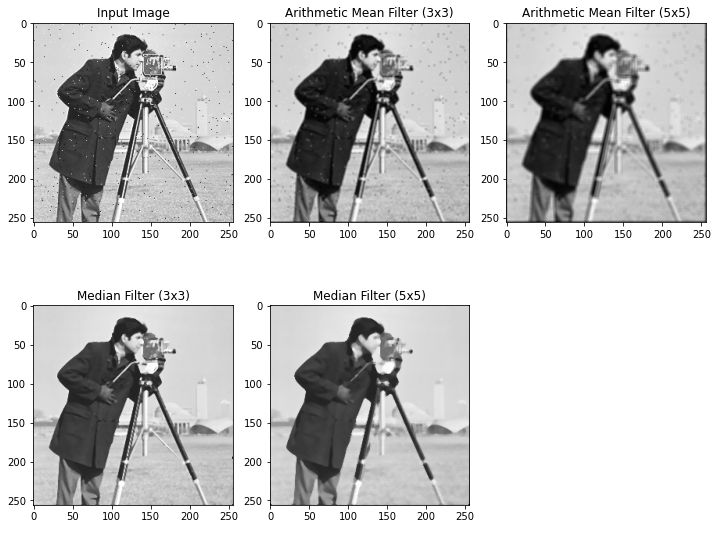

+------------+-----------+
| Metric     |     Value |
+============+===========+
| ssim_am_3  |  0.676521 |
+------------+-----------+
| ssim_am_5  |  0.550472 |
+------------+-----------+
| ssim_med_3 |  0.700198 |
+------------+-----------+
| ssim_med_5 |  0.610916 |
+------------+-----------+
| psnr_am_3  | 21.2031   |
+------------+-----------+
| psnr_am_5  | 19.2461   |
+------------+-----------+
| psnr_med_3 | 22.4513   |
+------------+-----------+
| psnr_med_5 | 20.4534   |
+------------+-----------+

******************************************
5% salt and pepr


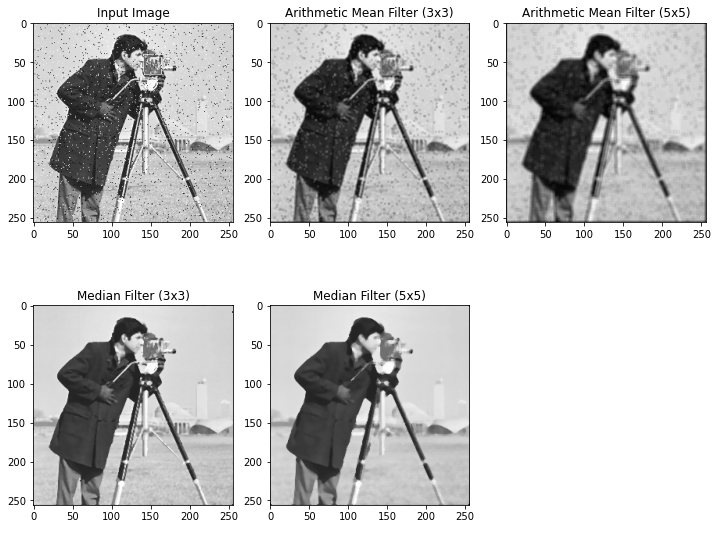

+------------+-----------+
| Metric     |     Value |
+============+===========+
| ssim_am_3  |  0.446434 |
+------------+-----------+
| ssim_am_5  |  0.317802 |
+------------+-----------+
| ssim_med_3 |  0.419116 |
+------------+-----------+
| ssim_med_5 |  0.349527 |
+------------+-----------+
| psnr_am_3  | 17.7995   |
+------------+-----------+
| psnr_am_5  | 16.6943   |
+------------+-----------+
| psnr_med_3 | 17.986    |
+------------+-----------+
| psnr_med_5 | 17.1741   |
+------------+-----------+

******************************************
sigma 1 gaussian 


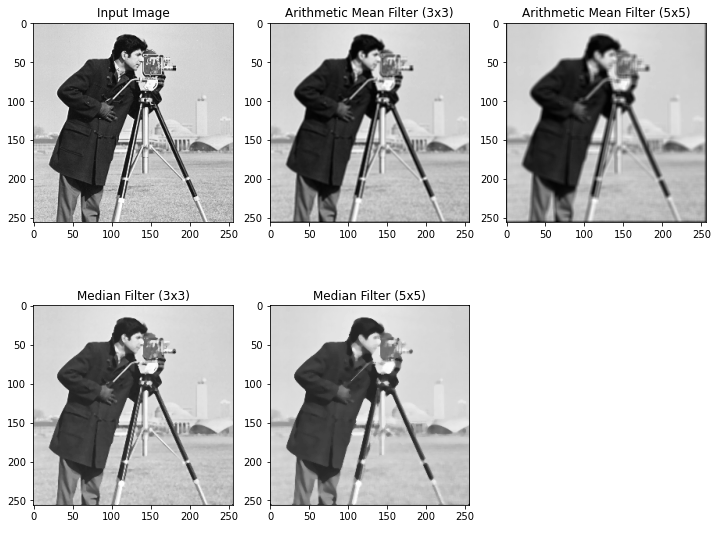

+------------+-----------+
| Metric     |     Value |
+============+===========+
| ssim_am_3  |  0.804768 |
+------------+-----------+
| ssim_am_5  |  0.676164 |
+------------+-----------+
| ssim_med_3 |  0.846387 |
+------------+-----------+
| ssim_med_5 |  0.746634 |
+------------+-----------+
| psnr_am_3  | 23.2276   |
+------------+-----------+
| psnr_am_5  | 20.4985   |
+------------+-----------+
| psnr_med_3 | 26.0327   |
+------------+-----------+
| psnr_med_5 | 22.319    |
+------------+-----------+

******************************************
sigma 5 gaussian 


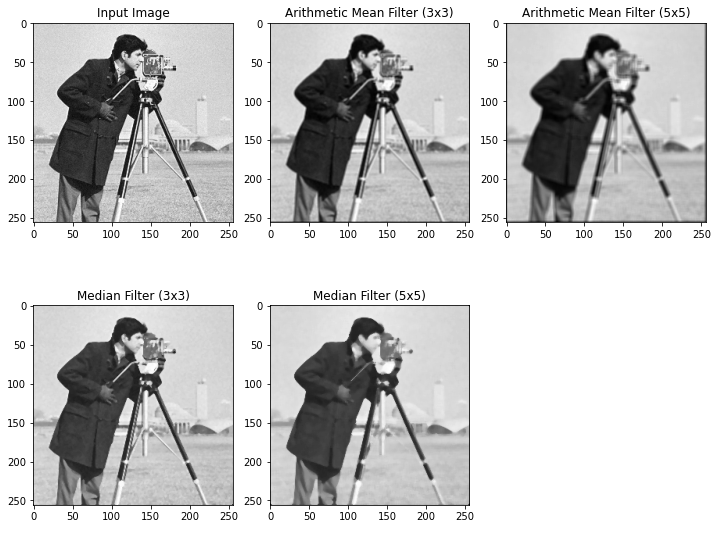

+------------+-----------+
| Metric     |     Value |
+============+===========+
| ssim_am_3  |  0.705159 |
+------------+-----------+
| ssim_am_5  |  0.572262 |
+------------+-----------+
| ssim_med_3 |  0.736618 |
+------------+-----------+
| ssim_med_5 |  0.629965 |
+------------+-----------+
| psnr_am_3  | 22.9537   |
+------------+-----------+
| psnr_am_5  | 20.3376   |
+------------+-----------+
| psnr_med_3 | 25.4809   |
+------------+-----------+
| psnr_med_5 | 22.0806   |
+------------+-----------+


In [8]:
#Original Image 
print('original image')
img = cv2.imread("cameraman.bmp", cv2.IMREAD_GRAYSCALE)
# img =salt_and_pepper_noise[1]

# Apply filters and compare results
filter_obj = ImageFilter(img)
results = filter_obj.compare_filters()
table = []
for key, value in results.items():
    table.append([key, value])

headers = ["Metric", "Value"]
print(tabulate(table, headers=headers, tablefmt="grid"))



#1% salt and peper 
print('')
print('******************************************')
print('1% salt and pepr')
img =salt_and_pepper_noise[0]

# Apply filters and compare results
filter_obj = ImageFilter(img)
results = filter_obj.compare_filters()
table = []
for key, value in results.items():
    table.append([key, value])

headers = ["Metric", "Value"]
print(tabulate(table, headers=headers, tablefmt="grid"))



#5% salt and peper 
print('')
print('******************************************')
print('5% salt and pepr')
img =salt_and_pepper_noise[1]

# Apply filters and compare results
filter_obj = ImageFilter(img)
results = filter_obj.compare_filters()
table = []
for key, value in results.items():
    table.append([key, value])

headers = ["Metric", "Value"]
print(tabulate(table, headers=headers, tablefmt="grid"))




#sigma 1 gaussian 
print('')
print('******************************************')
print('sigma 1 gaussian ')
img =gaussian_noise[0]

# Apply filters and compare results
filter_obj = ImageFilter(img)
results = filter_obj.compare_filters()
table = []
for key, value in results.items():
    table.append([key, value])

headers = ["Metric", "Value"]
print(tabulate(table, headers=headers, tablefmt="grid"))




#sigma 5 gaussian 
print('')
print('******************************************')
print('sigma 5 gaussian ')
img =gaussian_noise[1]

# Apply filters and compare results
filter_obj = ImageFilter(img)
results = filter_obj.compare_filters()
table = []
for key, value in results.items():
    table.append([key, value])

headers = ["Metric", "Value"]
print(tabulate(table, headers=headers, tablefmt="grid"))





